# MULTICLASS CLASSIFICATION 



In [106]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [107]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [108]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [109]:
#print the unique values in Y_train
print(np.unique(Y_train))


[0 1 2 3 4 5 6 7 8 9]


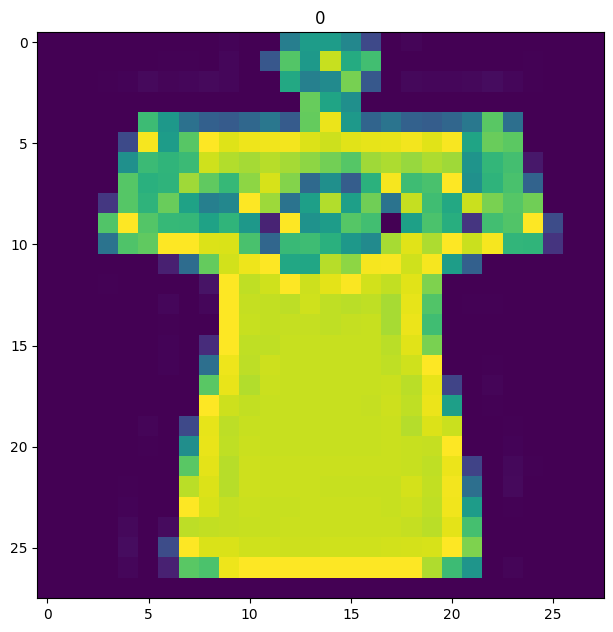

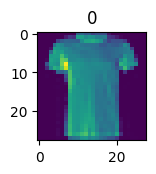

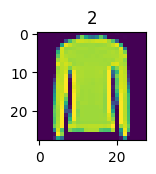

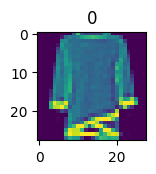

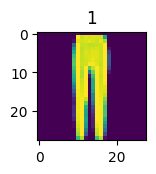

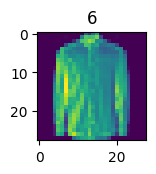

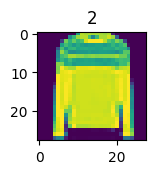

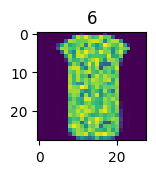

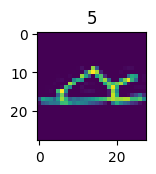

In [110]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
 index = random.randint(0,len(X_train)-1) # showing the index_th image
 plt.subplot(3,3,i+1)
  #edit1__plot_image_here_
  #edit2__add_label_here_
 plt.imshow(X_train[index])
 plt.title(Y_train[index])
 plt.show()


###These number denotes the respective object
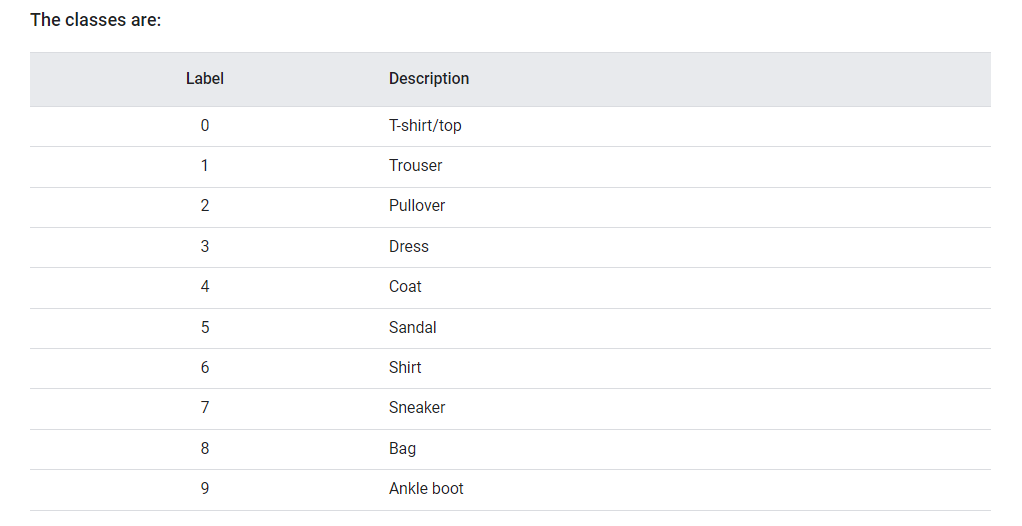

In [111]:
# Find the count of each type of class
label=np.unique(Y_train)
print(np.unique(Y_train,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([807, 798, 800, 804, 808, 785, 797, 784, 805, 812]))


In [112]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(32, activation='relu'))
#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))
_output_layer=model.layers[-1]
print(_output_layer)
output_shape=_output_layer.output_shape
print(output_shape)
output_layer_activation = model.layers[-1].activation
print(output_layer_activation)


(None, 10)
<function softmax at 0x7f3350453be0>


In [113]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) # __add_loss_function__
                  ,metrics=['accuracy'])

In [114]:
#Lets analyse the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [115]:
""" 
[objective] Write the answer here: From the summary total trainable parameters are 111,146.No non-trainable parameters in this model.
"""

' \n[objective] Write the answer here: from the summary total trainable parameters are 111,146.No non-trainable parameters in this model.\n'

In [116]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train ,batch_size=32,epochs=12, validation_split=0.2)

Epoch 1/12
200/200 [==============================] - 1s 4ms/step - loss: 5.4857 - accuracy: 0.5111 - val_loss: 1.1620 - val_accuracy: 0.6144
Epoch 2/12
200/200 [==============================] - 1s 4ms/step - loss: 0.9703 - accuracy: 0.6456 - val_loss: 1.0691 - val_accuracy: 0.6406
Epoch 3/12
200/200 [==============================] - 1s 4ms/step - loss: 0.8234 - accuracy: 0.6837 - val_loss: 0.9531 - val_accuracy: 0.6612
Epoch 4/12
200/200 [==============================] - 1s 4ms/step - loss: 0.7430 - accuracy: 0.7073 - val_loss: 0.8196 - val_accuracy: 0.7038
Epoch 5/12
200/200 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.7262 - val_loss: 0.8377 - val_accuracy: 0.7119
Epoch 6/12
200/200 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.7403 - val_loss: 0.8236 - val_accuracy: 0.6931
Epoch 7/12
200/200 [==============================] - 1s 4ms/step - loss: 0.6244 - accuracy: 0.7531 - val_loss: 0.8054 - val_accuracy: 0.7081
Epoch 

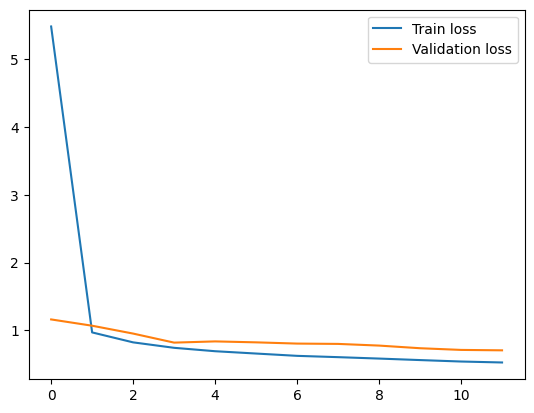

In [117]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [126]:
"""
[Under 100 words] Write your answer here: 
From the graph ,validation loss is more than train loss after a given epoch after every execution.And before their intersection Train loss is more than validation loss and also difference is considerable therefore overfitting till intersection.
And train loss is decreasing drastically till intersection.
That is model is adjusting its parameters for better prediction output of train output.As after intersection for every epoch difference in train and validation loss is not much to consider as overfitting.

"""

'\n[Under 100 words] Write your answer here: \nFrom the graph ,validation loss is more than train loss after a given epoch after every execution.And before their intersection Train loss is more than validation loss and also difference is considerable therefore overfitting till intersection.And train loss is decreasing drastically till intersection.That is model \nis adjusting its parameters for better prediction output of train output.As after intersection for every epoch difference in train and validation loss is not much to consider as overfitting.\n\n'

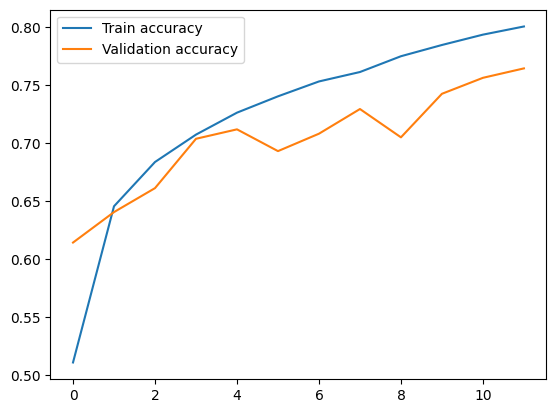

In [119]:
#plotting the accuracy of the training and validatio datasets

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [128]:
"""
[Under 100 words] Write your answer here:
As from graph we can see that train and validation accuracies are increasing with epochs,that means model is uprading its ability to classify data correctly.
Also for every epoch value validation accuracy in slightly differ than train accuracy,both intersect at some epoch value which is clear indicator that model is not overfitting.
Model is able to do task on new unseen data not just by memorizing training data but because of training.
since accuracy of both training and validation data are increasing which is a good sign that model is generalizing well.
But before their intersetion validation accuracy is more than train accuracy and train accuracy is increasing steeply which is clear indication of improving ability of model. 

"""

'\n[Under 100 words] Write your answer here:\nAs from graph we can see that train and validation accuracies are increasing with epochs,that means model is uprading its ability to classify data correctly.\nAlso for every epoch value validation accuracy in slightly differ than train accuracy,both intersect at some epoch value which is clear indicator that model is not overfitting.\nModel is able to do task on new unseen data not just by memorizing training data but because of training.\nsince accuracy of both training and validation data are increasing which is a good sign that model is generalizing well.\nBut before their intersetion validation accuracy is more than train accuracy and train accuracy is increasing steeply which is clear indication of improving ability of model. \n\n'

In [121]:
#Checking the prediction
Y_predicted = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [122]:
# Calculate the R2score for the test data 
from sklearn.metrics import r2_score
print(Y_test.shape)
print(Y_predicted.shape)
max_units = np.argmax(Y_predicted, axis=1)
print(max_units.shape)
R2score=r2_score(Y_test, max_units)
print(R2score)

(2000,)
(2000, 10)
(2000,)
0.5854217678296997


In [123]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [127]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)


(128, 64)
(64, 32)
(32, 10)


In [129]:
# Does that satisfied the matrix multiplication math discussed earlier
'''yes It is satisfying as number of column of previous layer matrix is same as number of rows of 
precceding layer's matrix which is required condition for matrix multiplication.As matrix of shape[784,128] premultiply with matrix of weights shaped [128,64] to give a layer matrix of shape [784,64] similary with matrix of shapes [64,32],[32,10] at end with [10,1] to give final output as matris of shape[784,1]'''

"yes It is satisfying as number of column of previous layer matrix is same as number of rows of \nprecceding layer's matrix which is required condition for matrix multiplication.As matrix of shape[784,128] premultiply with matrix of weights shaped [128,64] to give a layer matrix of shape [784,64] similary with matrix of shapes [64,32],[32,10] at end with [10,1] to give final output as matris of shape[784,1]"